<a href="https://colab.research.google.com/github/shrishtinigam/Computer_Vision_OpenCV/blob/main/Computer_Vision_Lab_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display
import math

In [ ]:
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

In [ ]:
urls = ["https://placekitten.com/800/571","https://backlightblog.com/images/2021/09/low-contrast-photography-1.jpg"]  # Random image of a kitten

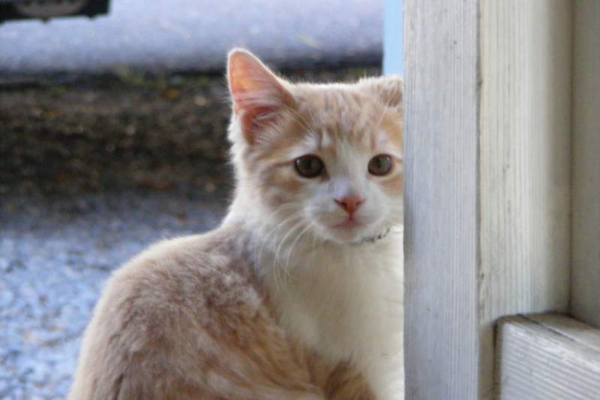

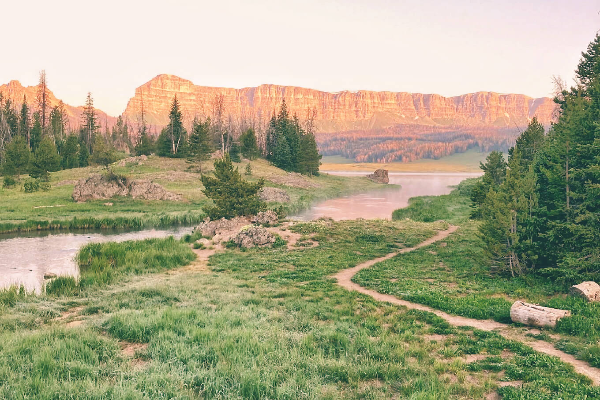

In [ ]:
images = []
for url in urls:
  image = io.imread(url)
  image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  resized = cv2.resize(image, (600, 400))
  cv2_imshow(resized)
  images.append(resized)
  print('\n')

In [ ]:
def grayscale(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    cv2_imshow(gray)
    return gray

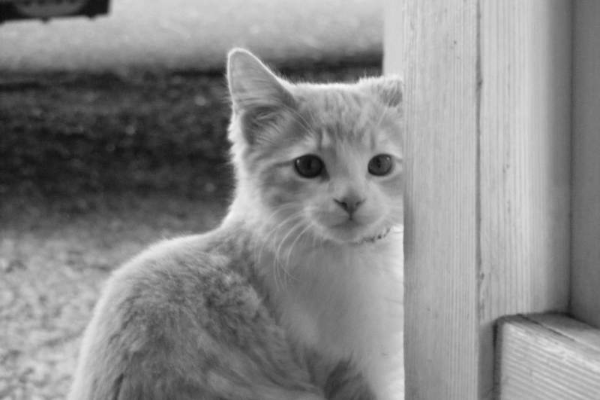

In [ ]:
gray = grayscale(images[0])

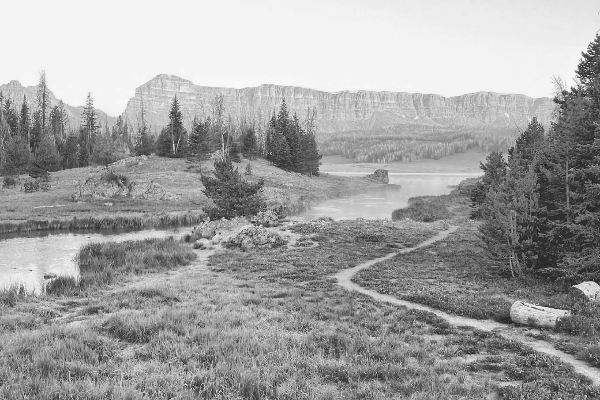

In [ ]:
gray2 = grayscale(images[1])

## 2. Add some noise to the image and save it as second image
### Adding salt and pepper noise to first quadrant of the image

In [ ]:
import random

In [ ]:
def random_noise(image, n, noiseval): # n is size of
  noisy = image.copy()
  r, c = image.shape
  r1 = random.randint(0, (int)((r-n-1)/2))
  c1 = random.randint(0, (int)((c-n-1)/2))
  for i in range(r1, r1+n):
    for j in range(c1, c1+n):
      noisy[i][j] = noiseval
  return noisy

In [ ]:
def random_noise_multiple(image, n, t):
  noisy = image.copy()
  for i in range(t):
    noiseval = random.randint(0, 255)
    noisy = random_noise(noisy, n, noiseval)
  cv2_imshow(noisy)
  return noisy

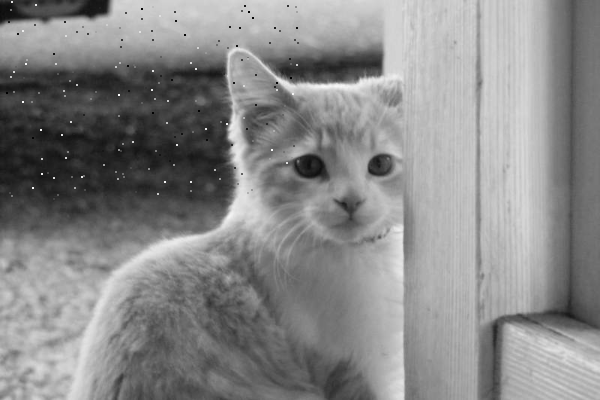

In [ ]:
gray_noisy = random_noise_multiple(gray, 2, 200)

## 3. Apply Wavelet Decomposition on the input image

In [ ]:
def waveletdecompositionrowise(A):
  r, c = A.shape
  print(r,c)
  decom = np.zeros((r, c//2))

  for i in range(r):
    for j in range(c//2):
      decom[i][j] = (A[i][j*2] + A[i][(j*2)+1]) // 2
  cv2_imshow(decom)
  """
  r, c = decom.shape
  print(r,c)
  decom2 = np.zeros((r//2, c))

  for i in range(r//2):
    for j in range(c):
      decom2[i][j] = (decom[i*2][j] + decom[(i*2)+1][j]) // 2
  cv2_imshow(decom2)
  """
  decom2 = np.zeros((r, c//2))
  for i in range(r):
    for j in range(c//2):
      decom2[i][j] = (A[i][j*2] - decom[i][j])
  cv2_imshow(decom2)
  return decom, decom2

400 600


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


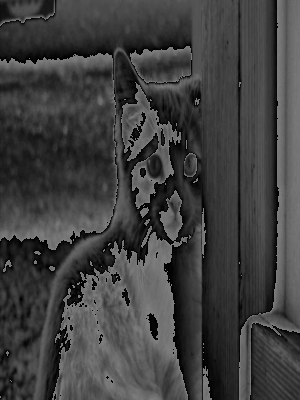

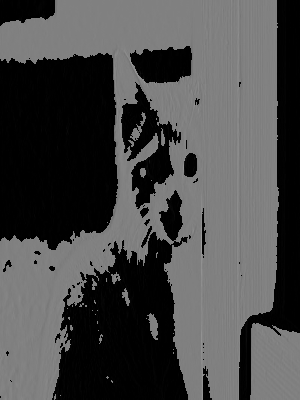

In [ ]:
O1ac, O1dc = waveletdecompositionrowise(gray)

## 4. Save the output as O1
### Saved

## 5. Apply Wavelet Decomposition on img2

400 600


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  


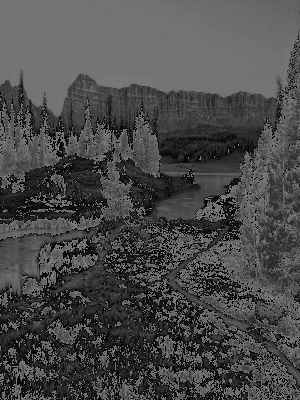

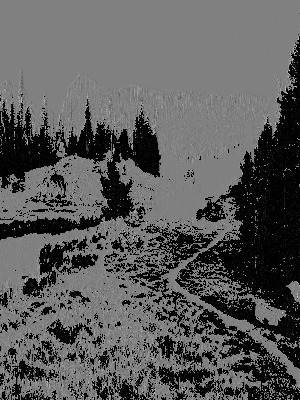

[[128. 128. 128. ... 128. 129. 128.]
 [128. 128. 128. ... 128. 129. 128.]
 [128. 128. 128. ... 128. 129. 128.]
 ...
 [124.  96. -48. ...  19. -16.  11.]
 [  1. 104. 115. ...   5.   9.  -5.]
 [144.  -5. 136. ...  -3. 123.  23.]]


In [ ]:
O2ac, O2dc = waveletdecompositionrowise(gray2)
print(O2dc)

## 6. Save the output as O2
### Saved

## 7. Compare the image quality of img2 and O2 using metrics
https://pyimagesearch.com/2014/09/15/python-compare-two-images/

In [ ]:
def removeNegativeValues(img):
  r, c = img.shape
  for i in range(r):
    for j in range(c):
      if(img[i][j] < 0):
        img[i][j] = 0
  return img

In [ ]:
from skimage.metrics import structural_similarity as ssim

In [ ]:
def mse(imageA, imageB):
	err = np.sum((imageA.astype("float") - imageB.astype("float")) ** 2)
	err /= float(imageA.shape[0] * imageA.shape[1])
	return err

def compare_images(imageA, imageB, title):
	m = mse(imageA, imageB)
	s = ssim(imageA, imageB)
	fig = plt.figure(title)
	plt.suptitle("MSE: %.2f, SSIM: %.2f" % (m, s))
	# show first image
	ax = fig.add_subplot(1, 2, 1)
	plt.imshow(imageA, cmap = plt.cm.gray)
	plt.axis("off")
	# show the second image
	ax = fig.add_subplot(1, 2, 2)
	plt.imshow(imageB, cmap = plt.cm.gray)
	plt.axis("off")
	# show the images
	plt.show()

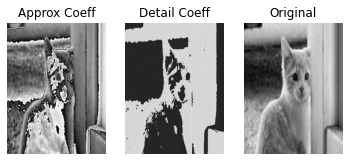

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: Inputs have mismatched dtype.  Setting data_range based on im1.dtype.
  


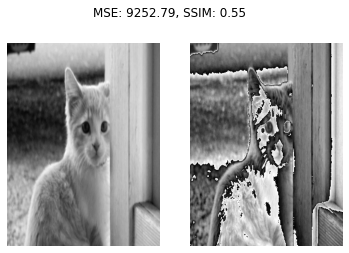

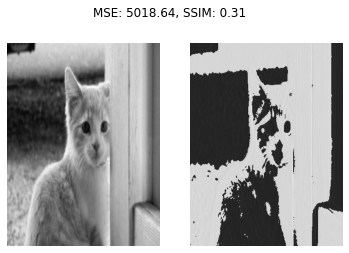

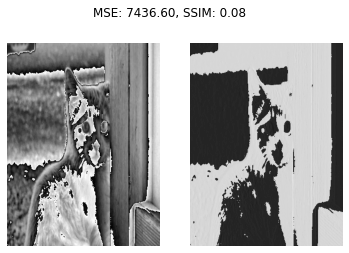

In [ ]:
# initialize the figure
fig = plt.figure("Images")
gray = cv2.resize(gray, (300, 400))
images = ("Approx Coeff", O1ac), ("Detail Coeff", O1dc), ("Original", gray)
# loop over the images
for (i, (name, image)) in enumerate(images):
	# show the image
	ax = fig.add_subplot(1, 3, i + 1)
	ax.set_title(name)
	plt.imshow(image, cmap = plt.cm.gray)
	plt.axis("off")
# show the figure
plt.show()
# compare the images
compare_images(gray, O1ac, "Original vs. Approx Coeff")
compare_images(gray, O1dc, "Original vs. Detail Coeff")
compare_images(O1ac, O1dc, "Approx Coeff vs. Detail Coeff")

## 8. Apply 2nd , 3rd, ….n levels of decomposition on O1 and save the outputs

To get these, we will apply wavelet transform to the images repeatedly.

400 300


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in byte_scalars
  


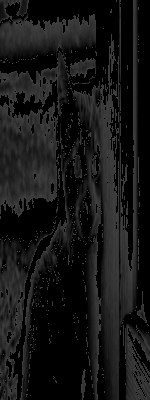

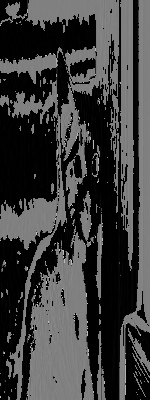

In [ ]:
O12ndac, O12nddc = waveletdecompositionrowise(O1ac)

400 300


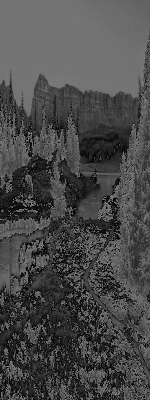

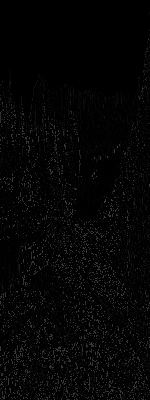

In [ ]:
O22ndac, O22nddc = waveletdecompositionrowise(O2ac)

400 150


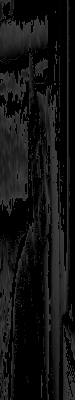

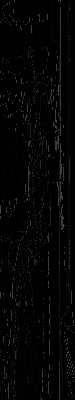

In [ ]:
O13rdac, O13rddc = waveletdecompositionrowise(O12ndac)

400 150


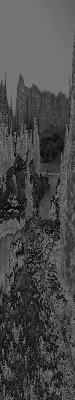

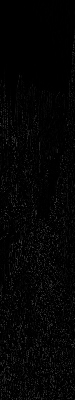

In [ ]:
O23rdac, O23rddc = waveletdecompositionrowise(O22ndac)

400 75


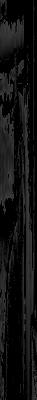

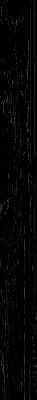

In [ ]:
O14thac, O14thdc = waveletdecompositionrowise(O13rdac)

400 75


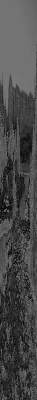

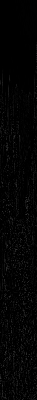

In [ ]:
O24thac, O24thdc = waveletdecompositionrowise(O23rdac)

## 9. Compare the image quality of the image obtained from decomposition at various levels

### The image quality slowly deprecates as the size of the image keeps reducing

## 10. Record every step along with the inference
Recorded